In [2]:
import sqlite3
import pandas as pd

In [3]:
db = sqlite3.connect('../../datasets/checking-logs.sqlite')

In [16]:
query = """ SELECT timestamp FROM checker
WHERE uid LIKE 'user_%'"""
commits = pd.read_sql(query, db, parse_dates='timestamp')
commits

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [21]:
commits['date'] = commits['timestamp'].dt.date
commits['time_of_day'] = commits['timestamp'].dt.hour.apply(
    lambda h: 'morning' if 4<=h<10 else
             'afternoon' if 10<=h<17 else
             'evening' if 17<=h<24 else 'night')

In [39]:
daily_commits = commits.groupby(['date', 'time_of_day']).size().unstack().fillna(0)
daily_commits = daily_commits[['night', 'morning', 'afternoon', 'evening']]

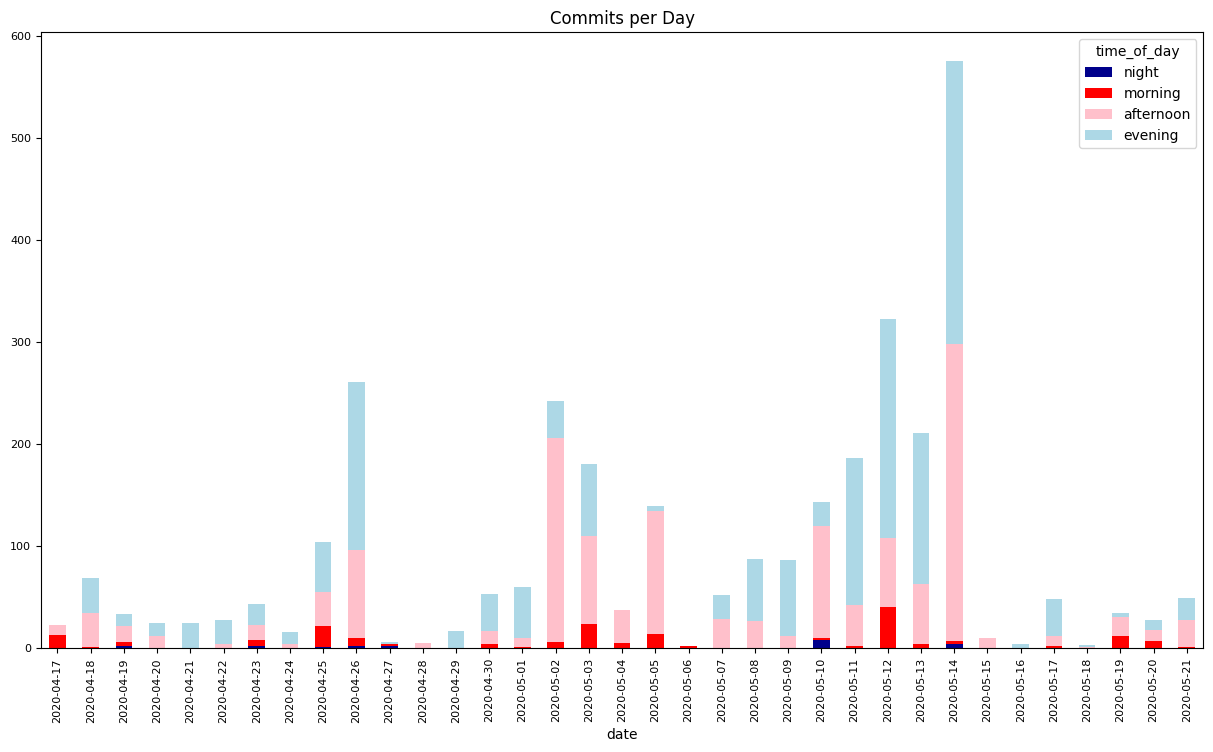

In [40]:
colors = {'night': 'darkblue',
          'morning': 'red',
          'afternoon': 'pink',
          'evening': 'lightblue',
          }
ax = daily_commits.plot(figsize = (15,8), kind = 'bar', color=[colors[col] for col in daily_commits.columns], rot = 90, fontsize=8, title='Commits per Day', stacked = True)

In [41]:
db.close()

When do our users usually commit the labs: in the night, morning, afternoon, or evening?

Answer: afternoon, evening


When do our users usually commit the labs: in the night, morning, afternoon, or evening?

Answer: 12.05.12